In [1]:
import pandas as pd
pd.set_option('display.max_rows', 100)
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning:

pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning:

pandas >= 1.0 is not supported.



#**Introduction**

In this tutorial, I will walk through a modeling example of how to use Python and R in the same notebook.

The data set we are using is from Duke Univeristy on the growth of trees within Duke Forest. We want to infer what variables lead to tree growth from the data set.

# **Exploratory Data Analysis**

In [2]:
#import the data into a pandas DataFrame
df = pd.read_excel('trees.xlsx')
df

,ID,yr,cm,annualprec,summerpdsi,wintertemp
0,290,1998,4.0,1.7650,-0.7950,5.633333
1,290,2002,4.4,1.8056,-1.0550,5.400000
2,290,2004,4.8,1.8532,-0.7950,5.100000
3,290,2006,5.1,1.4533,-2.0425,5.666667
4,290,2008,5.3,1.5392,-2.4700,4.833333
...,...,...,...,...,...,...
506,729,2006,26.4,1.4533,-2.0425,5.666667
507,729,2008,26.4,1.5392,-2.4700,4.833333
508,729,2010,26.5,1.4914,-1.5675,2.033333
509,729,2011,26.3,2.0694,-0.3875,5.133333


In [3]:
#number of distinct trees
df['ID'].nunique()

88

In [4]:
#look at the value collected by year
df['yr'].value_counts().sort_index()

1998    67
2002    68
2004    69
2006    64
2007    15
2008    77
2010    77
2011    74
Name: yr, dtype: int64

In [5]:
#calculate the growth rates for the trees. Note that it will be recalculated further down in the notebook
df.sort_values(by = ['yr', 'ID'])
df['cm_growth'] = df.groupby(['ID'])['cm'].pct_change()
df

,ID,yr,cm,annualprec,summerpdsi,wintertemp,cm_growth
0,290,1998,4.0,1.7650,-0.7950,5.633333,NaN
1,290,2002,4.4,1.8056,-1.0550,5.400000,0.100000
2,290,2004,4.8,1.8532,-0.7950,5.100000,0.090909
3,290,2006,5.1,1.4533,-2.0425,5.666667,0.062500
4,290,2008,5.3,1.5392,-2.4700,4.833333,0.039216
...,...,...,...,...,...,...,...
506,729,2006,26.4,1.4533,-2.0425,5.666667,0.000000
507,729,2008,26.4,1.5392,-2.4700,4.833333,0.000000
508,729,2010,26.5,1.4914,-1.5675,2.033333,0.003788
509,729,2011,26.3,2.0694,-0.3875,5.133333,-0.007547


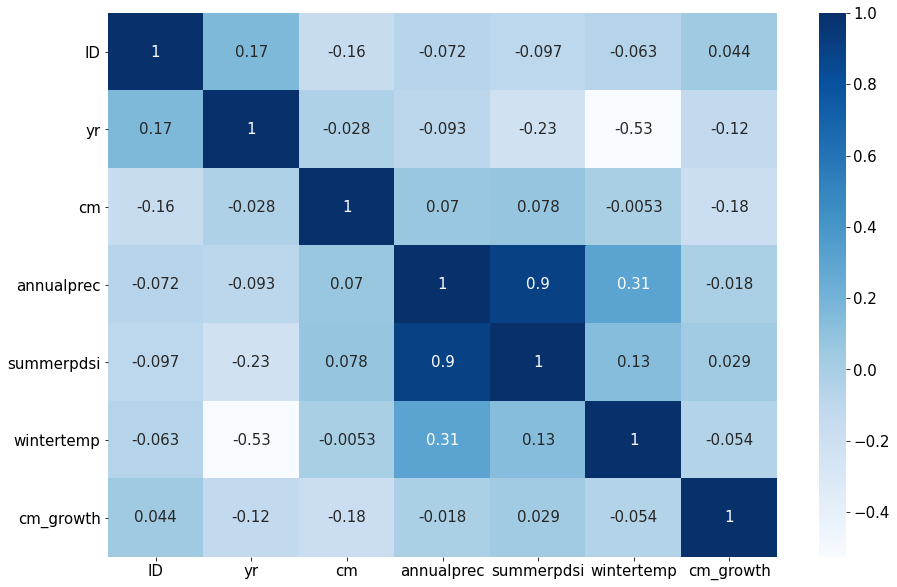

In [6]:
#correlation heatmap
plt.rcParams.update({'font.size':15})
plt.rcParams['figure.figsize'] = 15,10

corr_matrix = df.corr()
fig1 = sns.heatmap(corr_matrix, annot = True, cmap = 'Blues')

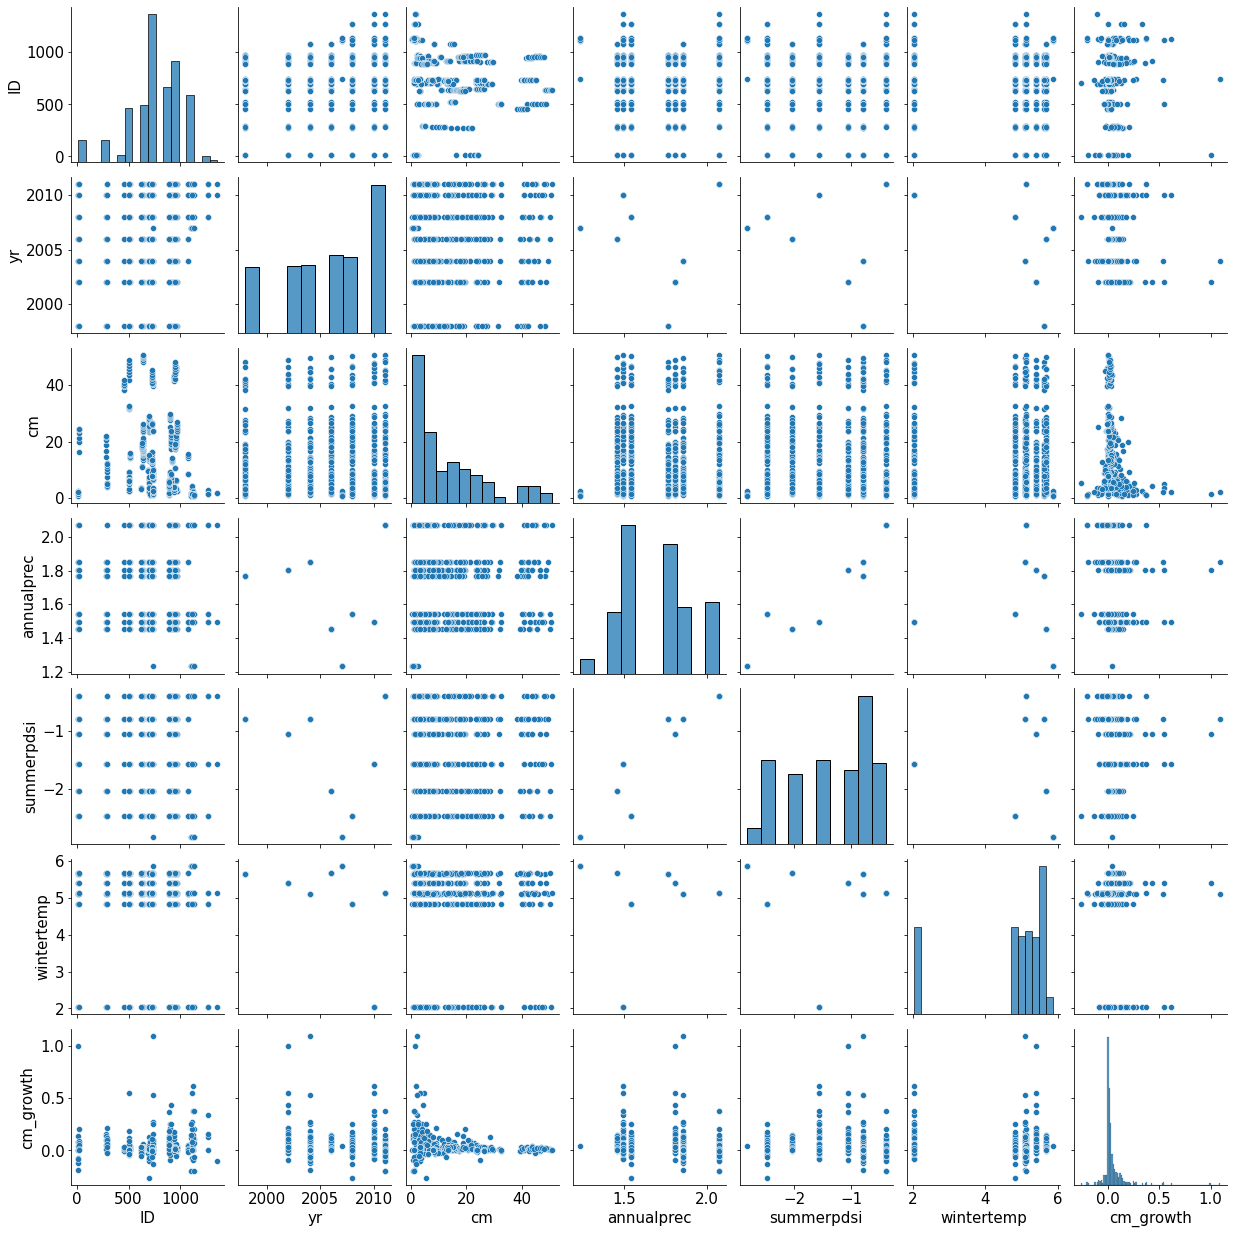

In [7]:
#pairplot

fig2 = sns.pairplot(df);

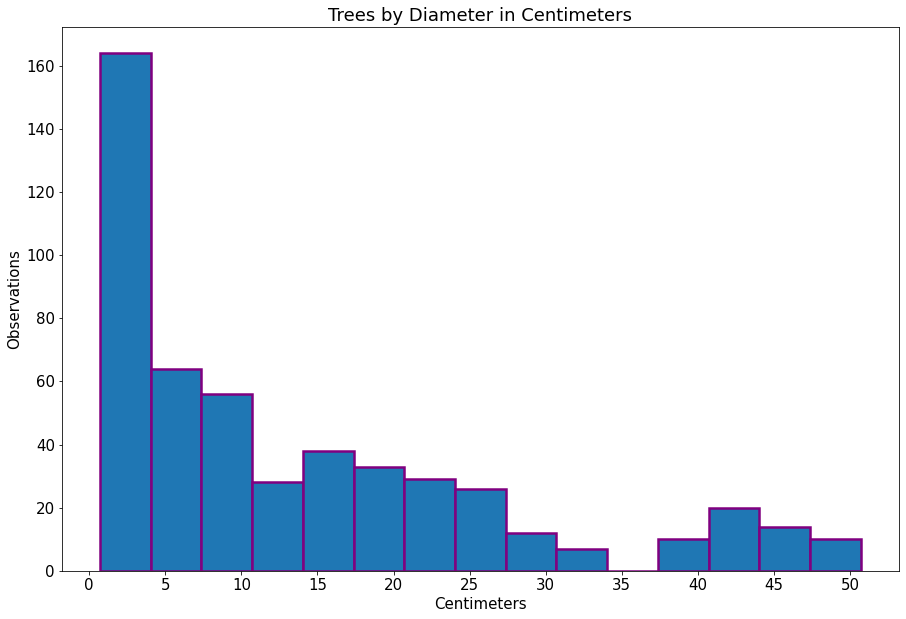

In [8]:
plt.hist(x = df['cm'], lw = 2.5, edgecolor = 'purple', bins = 15)
plt.xticks(np.arange(0,round(df['cm'].max() + 1), 5))
plt.xlabel('Centimeters')
plt.ylabel('Observations')
plt.title('Trees by Diameter in Centimeters');

In [9]:
#categorize the trees by size
conditions = [(df['cm'] <= 2.54), (df['cm'] > 2.54) & (df['cm'] <= 12.45), (df['cm'] > 12.45) & (df['cm'] <= 22.6),(df['cm'] > 22.6)]
values = ['Seedlings', 'Saplings', 'Poletimbers', 'Sawtimbers']

df['Tree_Size_Category'] = np.select(conditions, values)
df

,ID,yr,cm,annualprec,summerpdsi,wintertemp,cm_growth,Tree_Size_Category
0,290,1998,4.0,1.7650,-0.7950,5.633333,NaN,Saplings
1,290,2002,4.4,1.8056,-1.0550,5.400000,0.100000,Saplings
2,290,2004,4.8,1.8532,-0.7950,5.100000,0.090909,Saplings
3,290,2006,5.1,1.4533,-2.0425,5.666667,0.062500,Saplings
4,290,2008,5.3,1.5392,-2.4700,4.833333,0.039216,Saplings
...,...,...,...,...,...,...,...,...
506,729,2006,26.4,1.4533,-2.0425,5.666667,0.000000,Sawtimbers
507,729,2008,26.4,1.5392,-2.4700,4.833333,0.000000,Sawtimbers
508,729,2010,26.5,1.4914,-1.5675,2.033333,0.003788,Sawtimbers
509,729,2011,26.3,2.0694,-0.3875,5.133333,-0.007547,Sawtimbers


In [10]:
px.scatter(data_frame = df, x = 'summerpdsi', y = 'cm', color = 'Tree_Size_Category', trendline = 'ols')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [11]:
px.scatter(data_frame = df, x = 'summerpdsi', y = 'cm_growth', color = 'Tree_Size_Category', trendline = 'ols')

In [12]:
px.scatter(data_frame = df, x = 'wintertemp', y = 'cm', color = 'Tree_Size_Category', trendline = 'ols')

In [13]:
px.scatter(data_frame = df, x = 'wintertemp', y = 'cm_growth', color = 'Tree_Size_Category', trendline = 'ols')

In [14]:
#take the average size of each group of trees by year
df_tree_categories = df.groupby(['Tree_Size_Category', 'yr']).mean()
df_tree_categories.drop(columns = ['ID', 'cm_growth'], inplace = True)
df_tree_categories.reset_index(inplace = True)
#growth rate annualized
df_tree_categories['cm_growth'] = df_tree_categories.groupby(['Tree_Size_Category'])['cm'].pct_change()
df_tree_categories['yr_difference'] = df_tree_categories.groupby(['Tree_Size_Category'])['yr'].diff()
df_tree_categories['cm_growth'] = df_tree_categories['cm_growth']/df_tree_categories['yr_difference']
df_tree_categories

,Tree_Size_Category,yr,cm,annualprec,summerpdsi,wintertemp,cm_growth,yr_difference
0,Poletimbers,1998,16.084615,1.7650,-0.7950,5.633333,NaN,NaN
1,Poletimbers,2002,16.313333,1.8056,-1.0550,5.400000,0.003555,4.0
2,Poletimbers,2004,16.787500,1.8532,-0.7950,5.100000,0.014533,2.0
3,Poletimbers,2006,17.000000,1.4533,-2.0425,5.666667,0.006329,2.0
4,Poletimbers,2008,17.420000,1.5392,-2.4700,4.833333,0.012353,2.0
5,Poletimbers,2010,17.414286,1.4914,-1.5675,2.033333,-0.000164,2.0
6,Poletimbers,2011,17.407692,2.0694,-0.3875,5.133333,-0.000379,1.0
7,Saplings,1998,6.770370,1.7650,-0.7950,5.633333,NaN,NaN
8,Saplings,2002,6.315385,1.8056,-1.0550,5.400000,-0.016801,4.0
9,Saplings,2004,6.359259,1.8532,-0.7950,5.100000,0.003474,2.0


In [15]:
fig3 = px.scatter(data_frame = df_tree_categories, x = 'summerpdsi', y = 'cm', color = 'Tree_Size_Category', trendline = 'ols')
fig3

In [16]:
results = px.get_trendline_results(fig3)
print(results)

results.query("Tree_Size_Category == 'Seedlings'").px_fit_results.iloc[0].summary()

  Tree_Size_Category                                     px_fit_results
0        Poletimbers  <statsmodels.regression.linear_model.Regressio...
1           Saplings  <statsmodels.regression.linear_model.Regressio...
2         Sawtimbers  <statsmodels.regression.linear_model.Regressio...
3          Seedlings  <statsmodels.regression.linear_model.Regressio...


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=8



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     2.512
Date:                Fri, 25 Dec 2020   Prob (F-statistic):              0.164
Time:                        02:17:33   Log-Likelihood:              -0.094321
No. Observations:                   8   AIC:                             4.189
Df Residuals:                       6   BIC:                             4.348
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0631      0.207      9.985      0.000       1.558       2.569
x1             0.1919      0.121      1.585      0.164      -0.104       0.488
==============================================================================
Omnibus:                        0.147   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.929   Jarque-Bera (JB):                0.109
Skew:                           0.090   Prob(JB):                        0.947
Kurtosis:                       2.458   Cond. No.                         4.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
fig4 = px.scatter(data_frame = df, x = 'summerpdsi', y = 'cm', color = 'Tree_Size_Category', trendline = 'ols')
fig4

In [18]:
results = px.get_trendline_results(fig4)
print(results)

results.query("Tree_Size_Category == 'Seedlings'").px_fit_results.iloc[0].summary()

  Tree_Size_Category                                     px_fit_results
0           Saplings  <statsmodels.regression.linear_model.Regressio...
1         Sawtimbers  <statsmodels.regression.linear_model.Regressio...
2          Seedlings  <statsmodels.regression.linear_model.Regressio...
3        Poletimbers  <statsmodels.regression.linear_model.Regressio...


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     7.852
Date:                Fri, 25 Dec 2020   Prob (F-statistic):            0.00595
Time:                        02:17:33   Log-Likelihood:                -99.260
No. Observations:                 118   AIC:                             202.5
Df Residuals:                     116   BIC:                             208.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9953      0.110     18.136      0.000       1.777       2.213
x1             0.1731      0.062      2.802      0.006       0.051       0.295
==============================================================================
Omnibus:                       69.402   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.391
Skew:                          -0.096   Prob(JB):                       0.0151
Kurtosis:                       1.708   Cond. No.                         4.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
df_cm = df_tree_categories.drop(columns = ['cm_growth', 'yr_difference'])
df_cm_growth = df_tree_categories.drop(columns = ['cm', 'yr_difference'])
df_cm_growth.dropna(inplace = True)

In [20]:
df_cm.to_csv('df_cm.csv', index = False)
df_cm_growth.to_csv('df_cm_growth.csv', index = False)

# **Modeling with R**

In [21]:
%%R
#install packages 
devtools::install_github("dustinfife/flexplot")
install.packages("Metrics")

#read in packages
library(flexplot)
library(lme4)
library(Metrics)

R[write to console]: Skipping install of 'flexplot' from a github remote, the SHA1 (163137fe) has not changed since last install.
  Use `force = TRUE` to force installation

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/Metrics_0.1.4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 14898 bytes (14 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console

In [22]:
%%R
#you can call R objects in different cells
#load the csv files from pandas into an R DataFrame
df_cm <- read.csv('df_cm.csv')
df_cm_growth <- read.csv('df_cm_growth.csv')
df_cm

   Tree_Size_Category   yr        cm annualprec summerpdsi wintertemp
1         Poletimbers 1998 16.084615     1.7650    -0.7950   5.633333
2         Poletimbers 2002 16.313333     1.8056    -1.0550   5.400000
3         Poletimbers 2004 16.787500     1.8532    -0.7950   5.100000
4         Poletimbers 2006 17.000000     1.4533    -2.0425   5.666667
5         Poletimbers 2008 17.420000     1.5392    -2.4700   4.833333
6         Poletimbers 2010 17.414286     1.4914    -1.5675   2.033333
7         Poletimbers 2011 17.407692     2.0694    -0.3875   5.133333
8            Saplings 1998  6.770370     1.7650    -0.7950   5.633333
9            Saplings 2002  6.315385     1.8056    -1.0550   5.400000
10           Saplings 2004  6.359259     1.8532    -0.7950   5.100000
11           Saplings 2006  6.408696     1.4533    -2.0425   5.666667
12           Saplings 2007  2.600000     1.2303    -2.8350   5.866667
13           Saplings 2008  6.343478     1.5392    -2.4700   4.833333
14           Sapling

In [23]:
%%R
#isolate the explanatory variables
explanatory_variables <- names(df_cm)
explanatory_variables <- explanatory_variables[-c(1,3)]
explanatory_variables

[1] "yr"         "annualprec" "summerpdsi" "wintertemp"


In [24]:
%%R
#code from Stack Overflow, see references section 
n <- length(explanatory_variables)

id <- unlist(
        lapply(1:n,
              function(i)combn(1:n,i,simplify=FALSE)
        )
      ,recursive=FALSE)

Formulas <- sapply(id,function(i)
              paste("cm~",paste(explanatory_variables[i],collapse="+"))
            )

#model out exhaustively all possible multiple linear regression models for the explanatory variables
linear_models = lapply(Formulas, function(i)
    lm(as.formula(i),data = df_cm))

linear_model_summaries = lapply(linear_models, summary)

linear_model_summaries

[[1]]

Call:
lm(formula = as.formula(i), data = df_cm)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.841 -11.808  -7.478   3.534  21.251 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)   91.2958  1150.9980   0.079    0.937
yr            -0.0385     0.5739  -0.067    0.947

Residual standard error: 13.02 on 28 degrees of freedom
Multiple R-squared:  0.0001607,	Adjusted R-squared:  -0.03555 
F-statistic: 0.004502 on 1 and 28 DF,  p-value: 0.947


[[2]]

Call:
lm(formula = as.formula(i), data = df_cm)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.249 -10.160  -6.158   4.659  22.113 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)    1.981     17.027   0.116    0.908
annualprec     7.201     10.044   0.717    0.479

Residual standard error: 12.9 on 28 degrees of freedom
Multiple R-squared:  0.01803,	Adjusted R-squared:  -0.01704 
F-statistic: 0.514 on 1 and 28 DF,  p-value: 0.4794


[[3]]

Call:
lm(formula = as

In [25]:
%%R 
Formulas <- sapply(id,function(i)
              paste("cm~",paste(explanatory_variables[i],collapse="+"),'+(1|Tree_Size_Category)')
            )

#model out exhaustively all possible mixed effects models
mixed_models = lapply(Formulas,function(i)
    lmer(as.formula(i),data = df_cm))

mixed_model_summaries = lapply(mixed_models, summary) 

mixed_model_summaries

[[1]]
Linear mixed model fit by REML ['lmerMod']
Formula: cm ~ yr + (1 | Tree_Size_Category)
   Data: df_cm

REML criterion at convergence: 100.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1522 -0.2824  0.3338  0.5101  1.1756 

Random effects:
 Groups             Name        Variance Std.Dev.
 Tree_Size_Category (Intercept) 214.1442 14.6337 
 Residual                         0.6616  0.8134 
Number of obs: 30, groups:  Tree_Size_Category, 4

Fixed effects:
             Estimate Std. Error t value
(Intercept) -21.59007   72.30001  -0.299
yr            0.01814    0.03586   0.506

Correlation of Fixed Effects:
   (Intr)
yr -0.995

[[2]]
Linear mixed model fit by REML ['lmerMod']
Formula: cm ~ annualprec + (1 | Tree_Size_Category)
   Data: df_cm

REML criterion at convergence: 91.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7548 -0.1736  0.0492  0.6688  1.0360 

Random effects:
 Groups             Name        Variance Std.Dev.
 Tree_Size_Category (I

In [26]:
%%R
Formulas_cm_growth <- sapply(id,function(i)
              paste("cm_growth~",paste(explanatory_variables[i],collapse="+"),'+(1|Tree_Size_Category)')
            )

#model out exhaustively all possible mixed effects models for cm growth list
mixed_models_cm_growth = lapply(Formulas_cm_growth,function(i)
    lmer(as.formula(i),data = df_cm_growth))

mixed_model_summaries = lapply(mixed_models_cm_growth, summary)

mixed_models_cm_growth

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



[[1]]
Linear mixed model fit by REML ['lmerMod']
Formula: cm_growth ~ yr + (1 | Tree_Size_Category)
   Data: df_cm_growth
REML criterion at convergence: 24.5489
Random effects:
 Groups             Name        Std.Dev.
 Tree_Size_Category (Intercept) 0.0000  
 Residual                       0.3363  
Number of obs: 26, groups:  Tree_Size_Category, 4
Fixed Effects:
(Intercept)           yr  
  -14.55806      0.00727  
optimizer (nloptwrap) convergence code: 0 (OK) ; 0 optimizer warnings; 1 lme4 warnings 

[[2]]
Linear mixed model fit by REML ['lmerMod']
Formula: cm_growth ~ annualprec + (1 | Tree_Size_Category)
   Data: df_cm_growth
REML criterion at convergence: 19.4285
Random effects:
 Groups             Name        Std.Dev.
 Tree_Size_Category (Intercept) 0.0000  
 Residual                       0.3355  
Number of obs: 26, groups:  Tree_Size_Category, 4
Fixed Effects:
(Intercept)   annualprec  
    -0.1746       0.1239  
optimizer (nloptwrap) convergence code: 0 (OK) ; 0 optimizer warn

In [27]:
%%R
#BIC is used for model selection, the lower the value the better the model score
lapply(linear_models, BIC)

[[1]]
[1] 247.2547

[[2]]
[1] 246.7139

[[3]]
[1] 246.7532

[[4]]
[1] 247.1369

[[5]]
[1] 250.1148

[[6]]
[1] 250.1426

[[7]]
[1] 250.4567

[[8]]
[1] 250.1069

[[9]]
[1] 249.8519

[[10]]
[1] 250.0026

[[11]]
[1] 253.5055

[[12]]
[1] 253.1782

[[13]]
[1] 253.3931

[[14]]
[1] 253.2457

[[15]]
[1] 256.4709



In [28]:
%%R
lapply(mixed_models, BIC)

[[1]]
[1] 114.5203

[[2]]
[1] 104.7058

[[3]]
[1] 107.5592

[[4]]
[1] 110.4245

[[5]]
[1] 112.4286

[[6]]
[1] 114.7027

[[7]]
[1] 118.3518

[[8]]
[1] 107.8706

[[9]]
[1] 106.5843

[[10]]
[1] 110.9454

[[11]]
[1] 115.2476

[[12]]
[1] 114.7329

[[13]]
[1] 118.87

[[14]]
[1] 109.5326

[[15]]
[1] 116.7774



In [29]:
%%R
#intraclass correlation shows how much variability is caused by clustering
lapply(mixed_models, icc)

[[1]]
[[1]]$icc
[1] 0.9969199

[[1]]$design.effect
[1] 3.74153


[[2]]
[[2]]$icc
[1] 0.9973641

[[2]]$design.effect
[1] 3.742751


[[3]]
[[3]]$icc
[1] 0.9973161

[[3]]$design.effect
[1] 3.742619


[[4]]
[[4]]$icc
[1] 0.9970995

[[4]]$design.effect
[1] 3.742024


[[5]]
[[5]]$icc
[1] 0.9973252

[[5]]$design.effect
[1] 2.495988


[[6]]
[[6]]$icc
[1] 0.997333

[[6]]$design.effect
[1] 2.495999


[[7]]
[[7]]$icc
[1] 0.996983

[[7]]$design.effect
[1] 2.495474


[[8]]
[[8]]$icc
[1] 0.9972584

[[8]]$design.effect
[1] 2.495888


[[9]]
[[9]]$icc
[1] 0.9976571

[[9]]$design.effect
[1] 2.496486


[[10]]
[[10]]$icc
[1] 0.9974659

[[10]]$design.effect
[1] 2.496199


[[11]]
[[11]]$icc
[1] 0.9972374

[[11]]$design.effect
[1] 1.872583


[[12]]
[[12]]$icc
[1] 0.9975587

[[12]]$design.effect
[1] 1.872864


[[13]]
[[13]]$icc
[1] 0.9973697

[[13]]$design.effect
[1] 1.872698


[[14]]
[[14]]$icc
[1] 0.9975819

[[14]]$design.effect
[1] 1.872884


[[15]]
[[15]]$icc
[1] 0.9975161

[[15]]$design.effect
[1] 1.4987

In [30]:
%%R
lapply(mixed_models_cm_growth, icc)

[[1]]
[[1]]$icc
[1] 0

[[1]]$design.effect
[1] 1


[[2]]
[[2]]$icc
[1] 0

[[2]]$design.effect
[1] 1


[[3]]
[[3]]$icc
[1] 0

[[3]]$design.effect
[1] 1


[[4]]
[[4]]$icc
[1] 0

[[4]]$design.effect
[1] 1


[[5]]
[[5]]$icc
[1] 0

[[5]]$design.effect
[1] 1


[[6]]
[[6]]$icc
[1] 0

[[6]]$design.effect
[1] 1


[[7]]
[[7]]$icc
[1] 0

[[7]]$design.effect
[1] 1


[[8]]
[[8]]$icc
[1] 0

[[8]]$design.effect
[1] 1


[[9]]
[[9]]$icc
[1] 0

[[9]]$design.effect
[1] 1


[[10]]
[[10]]$icc
[1] 0

[[10]]$design.effect
[1] 1


[[11]]
[[11]]$icc
[1] 0

[[11]]$design.effect
[1] 1


[[12]]
[[12]]$icc
[1] 0

[[12]]$design.effect
[1] 1


[[13]]
[[13]]$icc
[1] 0

[[13]]$design.effect
[1] 1


[[14]]
[[14]]$icc
[1] 0

[[14]]$design.effect
[1] 1


[[15]]
[[15]]$icc
[1] 0

[[15]]$design.effect
[1] 1




In [31]:
%%R
#focus on the 3 best mixed models based on the Bayesian Information Criterion (BIC)
#models 2, 3 and 9
print(mse(df_cm$cm, predict(mixed_models[[2]], df_cm)))
print(mse(df_cm$cm, predict(mixed_models[[3]], df_cm)))
print(mse(df_cm$cm, predict(mixed_models[[9]], df_cm)))

[1] 0.4691137
[1] 0.4778907
[1] 0.3989725


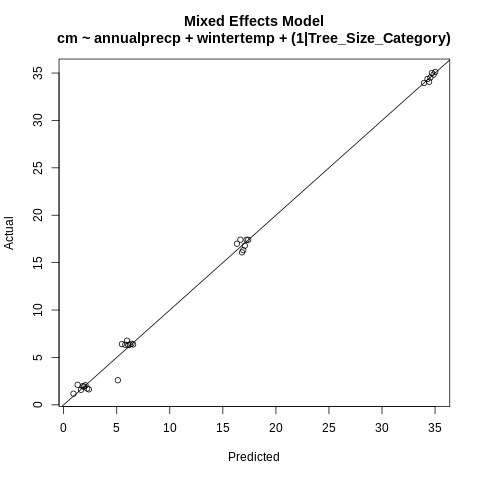

In [32]:
%%R
#model 9 explains the data the best out of the rest of the models
plot(predict(mixed_models[[9]]), df_cm$cm, xlab = 'Predicted', ylab = 'Actual', main = 'Mixed Effects Model\ncm ~ annualprecp + wintertemp + (1|Tree_Size_Category)')
abline(a = 0, b = 1)

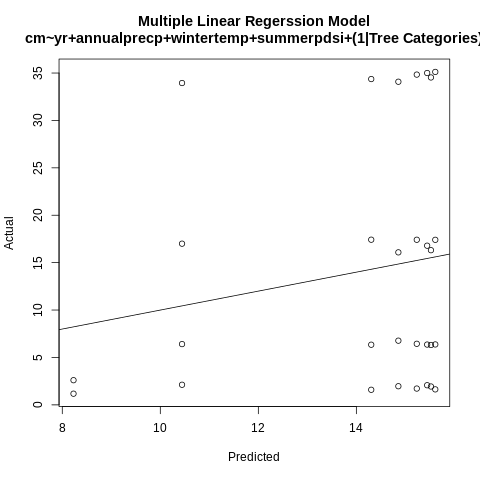

In [35]:
%%R
plot(predict(linear_models[[15]]), df_cm$cm, xlab = 'Predicted', ylab = 'Actual', main = 'Multiple Linear Regerssion Model\ncm~yr+annualprecp+wintertemp+summerpdsi+(1|Tree Categories)')
abline(a = 0, b = 1)

# **Conclusion**

## **Model**
$\large Avg \ \ CM_{imt} = \underbrace{\beta_0 + \beta_1AnnualPrec_{it} + \beta_2WinterTemp_{it}}_\text{Fixed Effects} + \underbrace{TC_{0mt}}_\text{Random Effect} + \epsilon_{imt}$

<br/>
<br/>

- $Avg \ \ CM_{imt} = \text{Average diameter in centimeters of group $m$ and observation $i$ at year $t$, where the range is: }[0,\infty)]$

- $Avg \ \ CM_{it} = \text{cumulative precipitation within a year, where the domain is: }[\text{22 inches}, \text{140 inches})]$

- $WinterTemp_{it} = \text{Temperature during January, February and March, where the domain is: }[-37 \ Celsius, 43 \ Celsius)$

- $TC_{0mt} = \text{Tree classification, the random effect, where the groups are: (saplings, seedlings, poletimbers, sawtimbers]}$


## **Model Assumptions**
The mixed effects model has one random effect (tree size category), with the remaining explanatory variables being fixed effects. Tree size categories were chosen as the random effect because of the varying growth rates among the groups. Because seedlings grow at a faster pace than poletimbers, they can not be grouped together because that would skew the results. The random effect is a way to deal with the tree size parameter. For the fixed effects, the following assumptions were made: the residuals are IID, large outliers are unlikely and there is no significant multicollinearity. 

## **Results**

The highlighted model performed the best based on BIC and Mean Squared Error metrics. The model does a good job in explaining the average diameter of the tree groups, however a model to explain the growth of individual trees was not found. 

<br/>

Analyzing the explanatory fixed effect variables, more rain tends to lead to a larger diameter measurement for a tree, while warmer winters tended to lead to a smaller diameter measurement. The result from the winter temperature variable seems counterintuitive, however, professors from UW-Madison noted that if winter temperatures from January to March are unseasonably warm bringing an early bloom and then April turns cold, this can kill trees (Ackerman & Martin, 2017)

<br/>

Futhermore, the data set is small (only 30 observations). More data needs to be collected in order to test the model to verify that it can infer the average diameter measurement of tree groups. Additional data may not be available from Duke University, so data sets from national parks or other university forests should be considered.

<br/>

What can be infered is that grouping trees by their category size is helpful when modeling the diameter of the trees. The data clearly show clustering and this is further quantified with the high intraclass correlations seen across the mixed effects models.

# **References**

- Data retrieved from [Duke Department of Statistical Science](https://stat.duke.edu/datasets/diameter-measurement
)

## **Dendrology (tree science) References**

- **[Do trees need cold weather?](https://wxguys.ssec.wisc.edu/2017/10/02/trees-need-cold/) by Steven A. Ackerman and Jonathan Martin**

- **[Periodic Mapped-plot Design Inventory Terminology](https://www.fs.fed.us/rm/ogden/publications/reference/periodic_terminology_final.pdf) (tree size classification) by the USDA Forest Service**

## **R References**

- **[Mixed Models with R](https://m-clark.github.io/mixed-models-with-R/random_intercepts.html) by Michael Clark**

- **[Building and Comparing Mixed Models in R](https://www.youtube.com/watch?v=Wtk5iZ65XHk) by Quant Psych**

- **[Use = or <- for assignment?](https://blog.revolutionanalytics.com/2008/12/use-equals-or-arrow-for-assignment.html) by David Smith**

- **[Stack Overflow Post 1](https://stackoverflow.com/questions/5300595/automatically-create-formulas-for-all-possible-linear-models) on Looping through Explanatory Variables in R**

- **[Stack Overflow Post 2](https://stackoverflow.com/questions/15901224/what-is-difference-between-dataframe-and-list-in-r) on R Lists and DataFrames** 